In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C://Users//ronak//Downloads//car data.csv")

In [6]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
#Exploratory Data Analysis

In [10]:
print(" First few rows of the dataset:")
df.head()

 First few rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.shape


(301, 9)

In [13]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
print('Missing Values')
df.isnull().sum()

Missing Values


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [17]:
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [18]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [20]:
#Data visualization and EDA

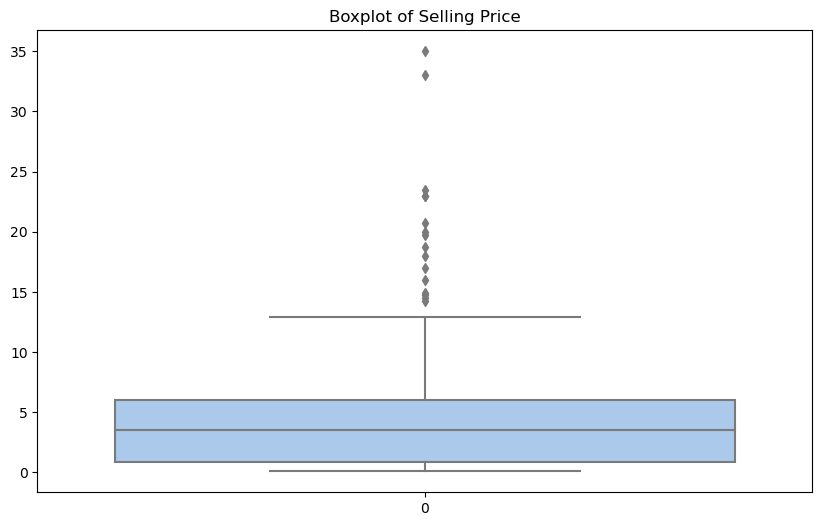

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

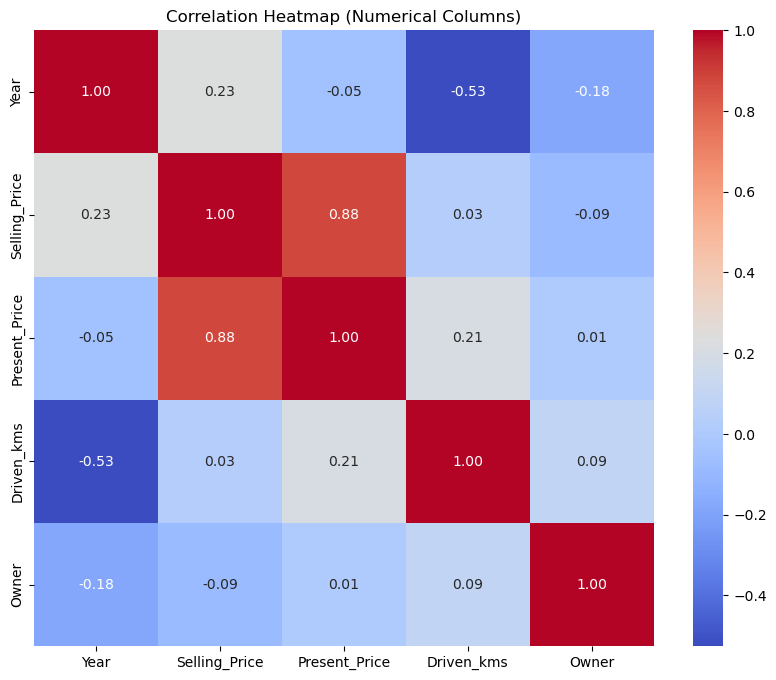

In [22]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

<Figure size 1000x600 with 0 Axes>

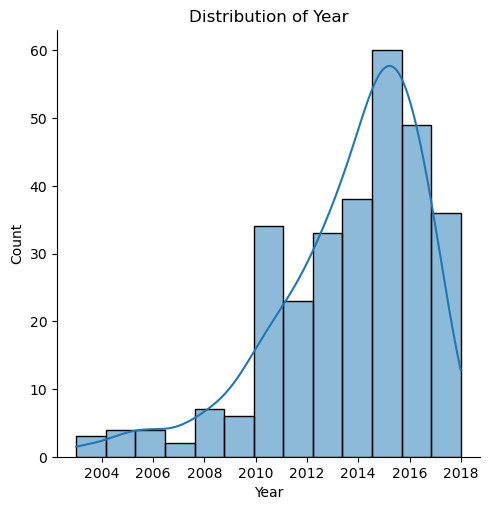

<Figure size 1000x600 with 0 Axes>

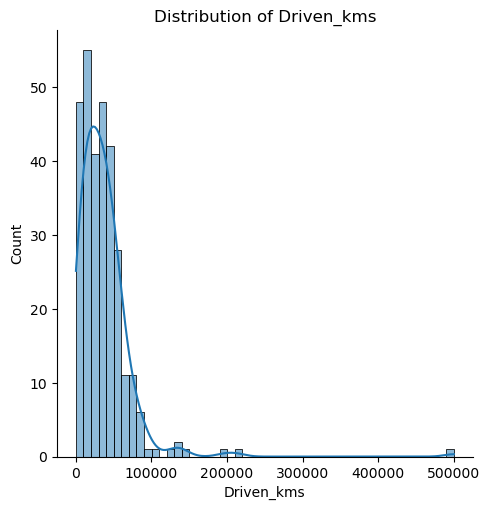

<Figure size 1000x600 with 0 Axes>

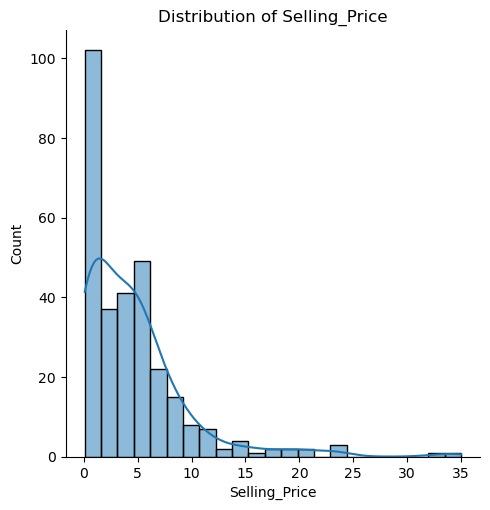

<Figure size 1000x600 with 0 Axes>

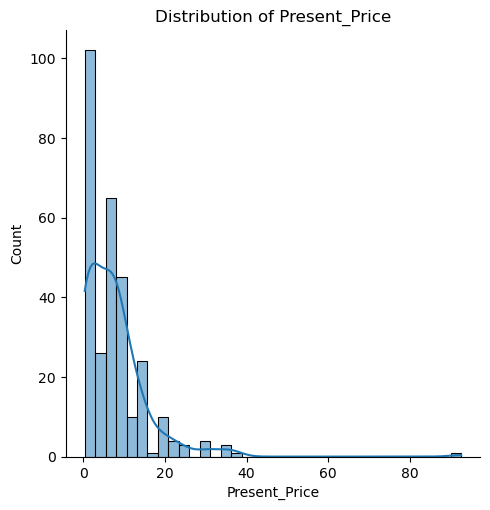

In [23]:
numerical_features=['Year','Driven_kms','Selling_Price','Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.displot(data=df,x=feature,kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

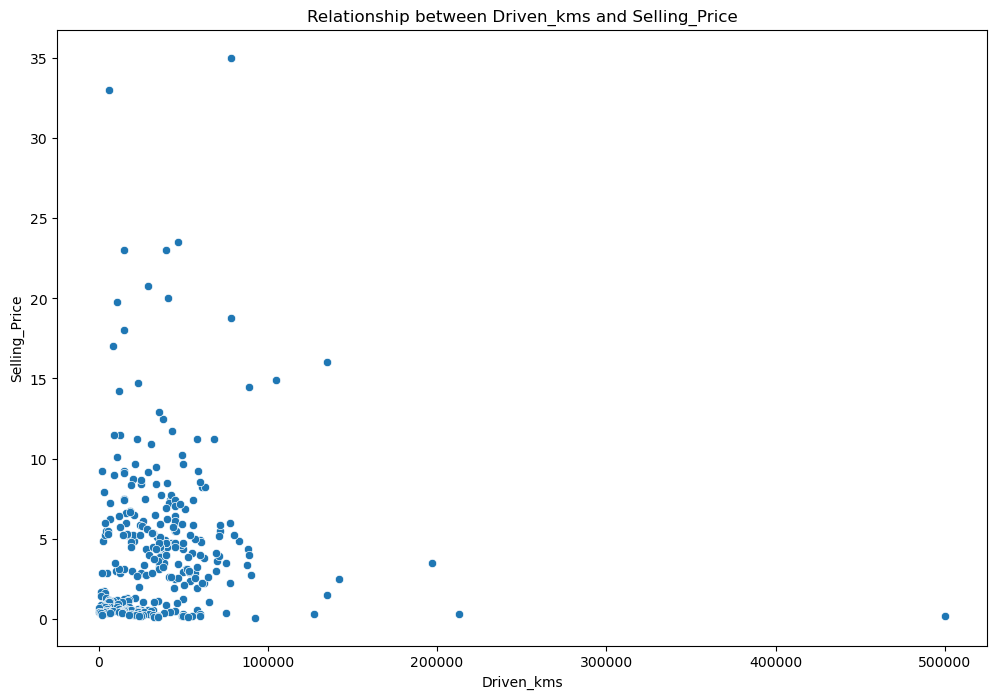

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Driven_kms',y='Selling_Price',data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()


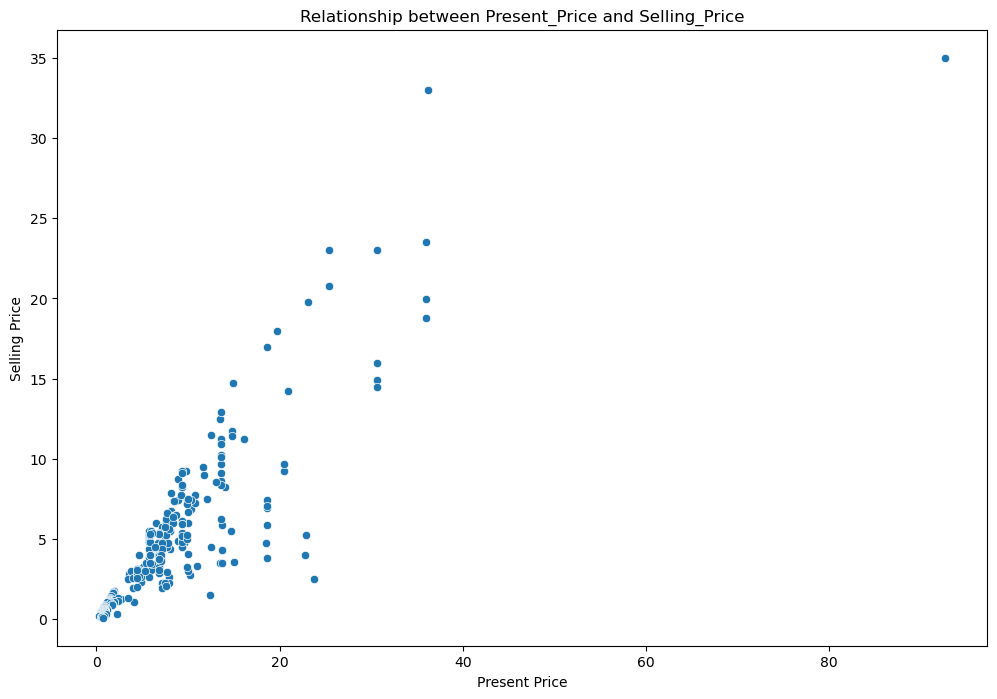

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

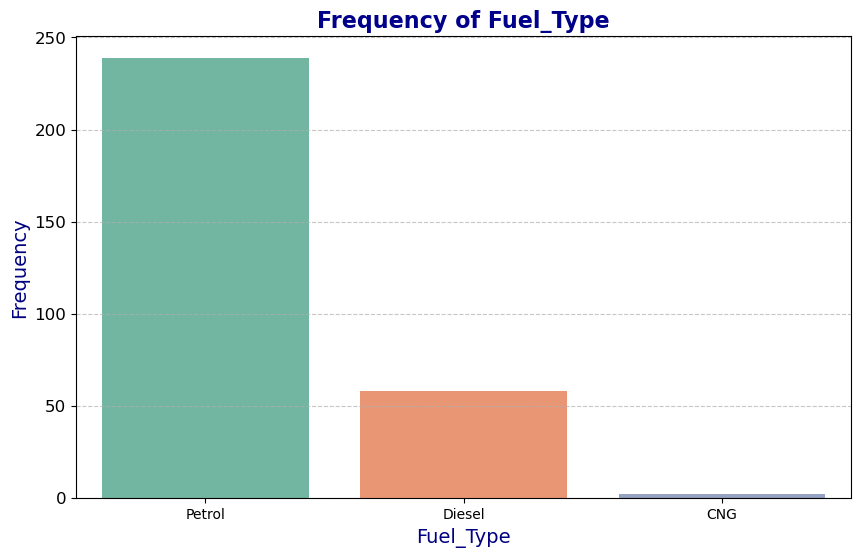

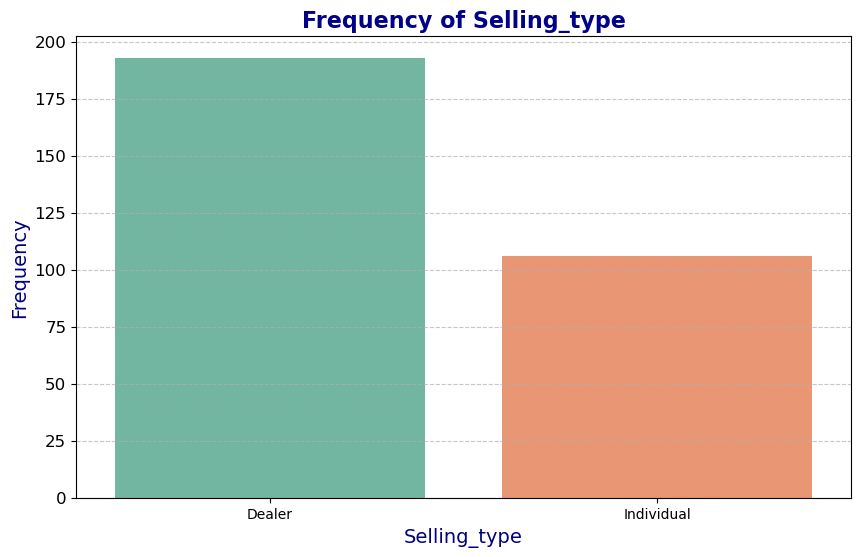

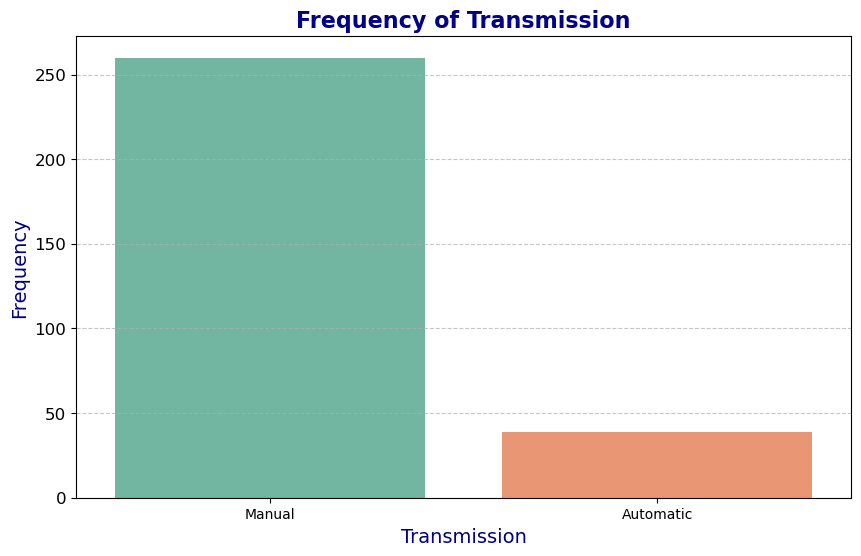

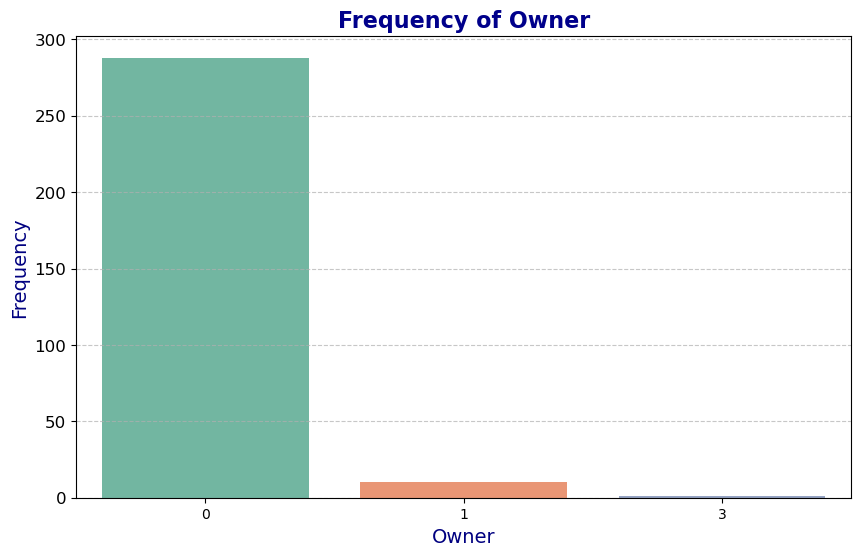

In [26]:
colors=sns.color_palette("Set2")
categorical_features=['Fuel_Type', 'Selling_type', 'Transmission','Owner']


for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature,data=df,palette=colors)
    plt.title(f'Frequency of {feature}',fontsize=16,color='darkblue',fontweight='bold')
    plt.xlabel(f'{feature}',fontsize=14,color='navy')
    plt.ylabel('Frequency',fontsize=14,color='navy')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [27]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

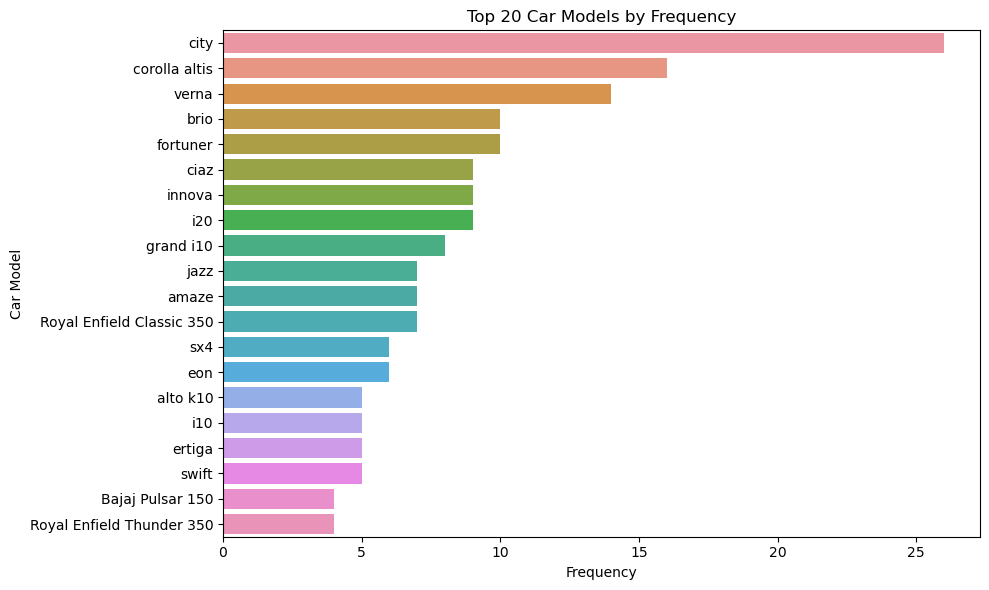

In [28]:
n = 20  
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()